In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
sns.set_palette('Set2')
sns.set_context("notebook", font_scale=1)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Import and Inspections

In [2]:
renttherunway = pd.read_json('Datasets/renttherunway_final_data.json',lines=True)
renttherunway.head(3)

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"


Number of customers: 105,508

Number of products: 5,850

Number of transactions: 192,544

### Field Description:

**item_id:** unique product id

**weight:** weight measurement of customer

**rented for:** purpose clothing was rented for

**body type:** body type of customer

**review_text:** review given by the customer

**review_summary:** summary of the review

**size:** the standardized size of the product

**rating:** rating for the product

**age:** age of the customer

**category:** the category of the product

**bust size:** bust measurement of customer

**height:** height of the customer

**fit:** fit feedback

**user_id:** a unique id for the customer

review_date: date when the review was written

In [3]:
display(renttherunway.info())
display(renttherunway.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   fit             192544 non-null  object 
 1   user_id         192544 non-null  int64  
 2   bust size       174133 non-null  object 
 3   item_id         192544 non-null  int64  
 4   weight          162562 non-null  object 
 5   rating          192462 non-null  float64
 6   rented for      192534 non-null  object 
 7   review_text     192544 non-null  object 
 8   body type       177907 non-null  object 
 9   review_summary  192544 non-null  object 
 10  category        192544 non-null  object 
 11  height          191867 non-null  object 
 12  size            192544 non-null  int64  
 13  age             191584 non-null  float64
 14  review_date     192544 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 22.0+ MB


None

,user_id,item_id,rating,size,age
count,192544.000000,1.925440e+05,192462.000000,192544.000000,191584.000000
mean,499494.100149,1.045684e+06,9.092371,12.245175,33.871017
std,289059.719328,8.053148e+05,1.430044,8.494877,8.058083
min,9.000000,1.233730e+05,2.000000,0.000000,0.000000
25%,250654.250000,1.950760e+05,8.000000,8.000000,29.000000
50%,499419.000000,9.483960e+05,10.000000,12.000000,32.000000
75%,750974.000000,1.678888e+06,10.000000,16.000000,37.000000
max,999997.000000,2.966087e+06,10.000000,58.000000,117.000000


## Null Values in Percentage

In [4]:
np.round(renttherunway.isna().sum()/len(renttherunway)*100,2)

fit                0.00
user_id            0.00
bust size          9.56
item_id            0.00
weight            15.57
rating             0.04
rented for         0.01
review_text        0.00
body type          7.60
review_summary     0.00
category           0.00
height             0.35
size               0.00
age                0.50
review_date        0.00
dtype: float64

# Filtering and Validating Data
## Handling Null Values

In [5]:
renttherunway['review_date'] = pd.to_datetime(renttherunway['review_date'])
renttherunway.dropna(subset=['bust size','weight','rented for','rating','body type','height'], inplace=True)
renttherunway['age'] = renttherunway['age'].fillna(renttherunway['age'].median())
np.round(renttherunway.isna().sum()/len(renttherunway)*100,2)

fit               0.0
user_id           0.0
bust size         0.0
item_id           0.0
weight            0.0
rating            0.0
rented for        0.0
review_text       0.0
body type         0.0
review_summary    0.0
category          0.0
height            0.0
size              0.0
age               0.0
review_date       0.0
dtype: float64

## Turning heights to numerical in inches

In [6]:
renttherunway['height'] = renttherunway['height'].str.replace('"','').str.replace("'","")
height_in_inches=[]
feet=[]
inches=[]
for i in range(146701):
    heights = renttherunway['height'].iloc[i].split()
    feet.append(int(heights[0]))
    inches.append(int(heights[1]))
    height_in_inches.append(feet[i]*12 +inches[i])
renttherunway['height'] = height_in_inches

## Fixing Weight and Height Columns

In [7]:
renttherunway['weight'] = renttherunway['weight'].str.replace('lbs','').astype(int)
renttherunway.loc[renttherunway['age']>106,'age'] = renttherunway[renttherunway['age']>106]['age']-100
renttherunway = renttherunway[renttherunway['age']>10].copy()

# EDA:

In [8]:
print(f"Number of Customers: {renttherunway['user_id'].nunique()}\nNumber of products: {renttherunway['item_id'].nunique()}\n\n")
renttherunway.info()

Number of Customers: 77564
Number of products: 5737


<class 'pandas.core.frame.DataFrame'>
Index: 146660 entries, 0 to 192543
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   fit             146660 non-null  object        
 1   user_id         146660 non-null  int64         
 2   bust size       146660 non-null  object        
 3   item_id         146660 non-null  int64         
 4   weight          146660 non-null  int64         
 5   rating          146660 non-null  float64       
 6   rented for      146660 non-null  object        
 7   review_text     146660 non-null  object        
 8   body type       146660 non-null  object        
 9   review_summary  146660 non-null  object        
 10  category        146660 non-null  object        
 11  height          146660 non-null  int64         
 12  size            146660 non-null  int64         
 13  age             146660 non-null  float64

## Categorical Columns:

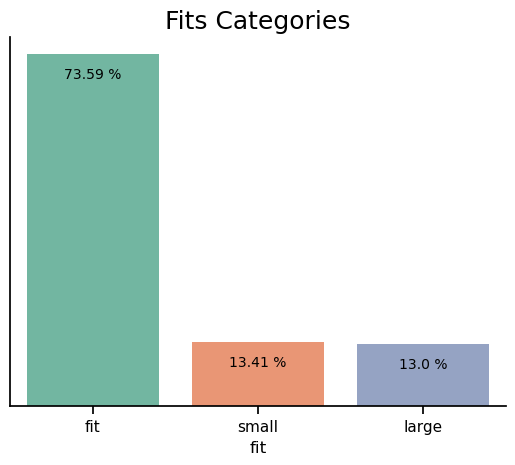

In [9]:
fits = renttherunway['fit'].value_counts(normalize=True).sort_values(ascending=False)
fits_g = sns.barplot(x=fits.index,y=fits.values)
fits_g.set_title('Fits Categories',fontsize=18)
fits_g.set_yticks([])
for i, v in enumerate(fits.values):
   fits_g.text(i, v - 0.05, f'{v.round(4)*100} %', ha='center',fontsize=10)
fits_g.spines['top'].set_visible(False)
fits_g.spines['right'].set_visible(False)

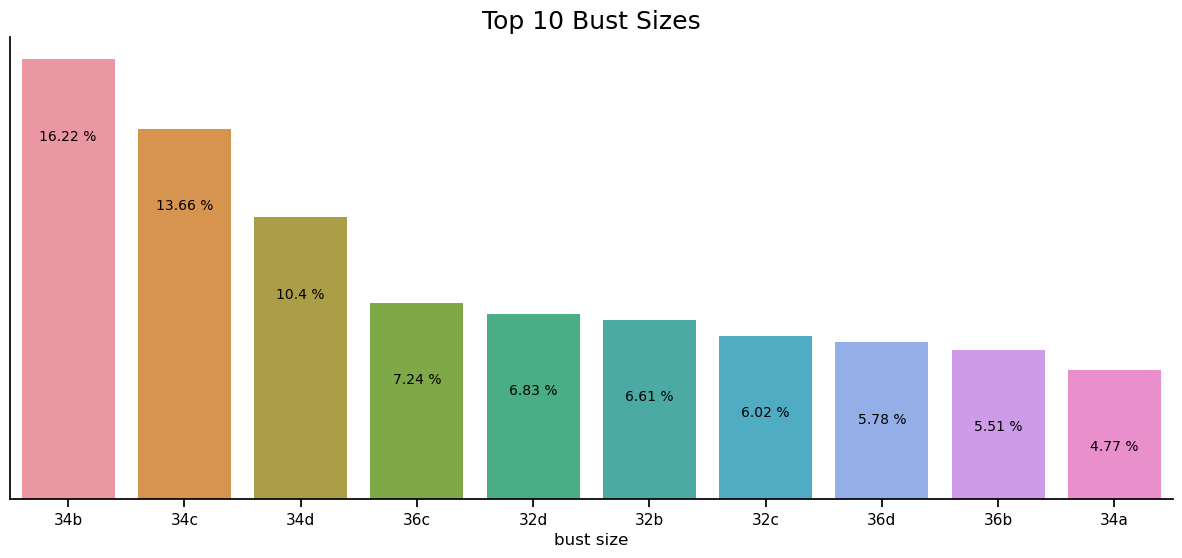

In [10]:
busts = (renttherunway['bust size'].value_counts(normalize=True)*100).round(2)
busts_g, fig = plt.subplots(1,1,figsize=(15,6))
busts_g = sns.barplot(x=busts[:10].index,y=busts[:10].values)
busts_g.set_title('Top 10 Bust Sizes',fontsize=18)
busts_g.set_yticks([])
for i, v in enumerate(busts[:10].values):
   busts_g.text(i, v - 3, f'{v} %', ha='center',fontsize=10)
busts_g.spines['top'].set_visible(False)
busts_g.spines['right'].set_visible(False)

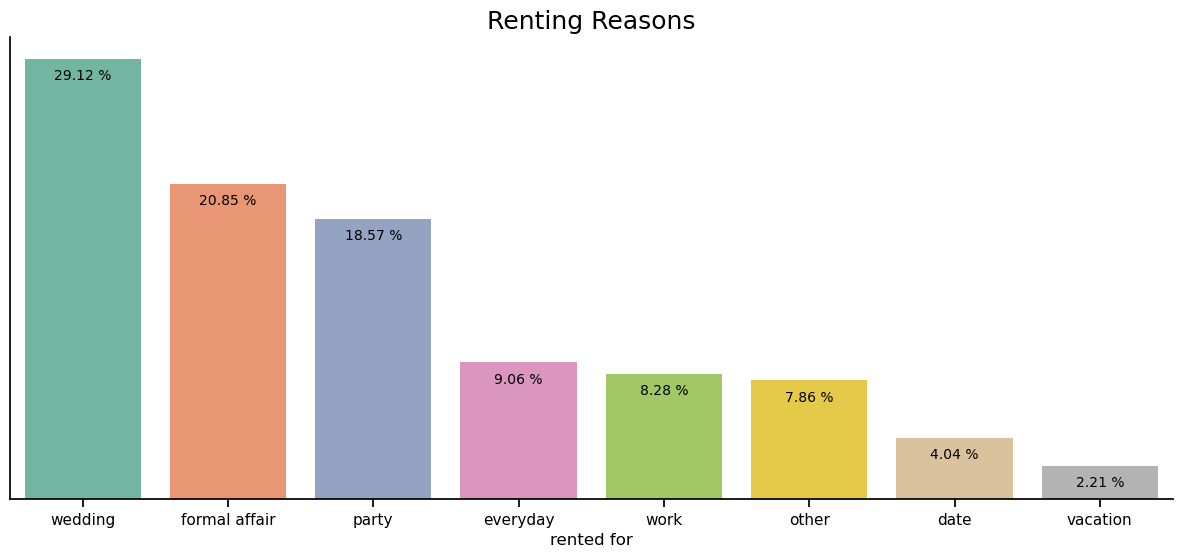

In [11]:
rented_for = (renttherunway['rented for'].value_counts(normalize=True)*100).round(2)[:-1]
rents_g, fig = plt.subplots(1,1,figsize=(15,6))
rents_g = sns.barplot(x=rented_for.index,y=rented_for.values)
rents_g.set_title('Renting Reasons',fontsize=18)
rents_g.set_yticks([])
for i, v in enumerate(rented_for[:10].values):
   rents_g.text(i, v - 1.4, f'{v} %', ha='center',fontsize=10)
rents_g.spines['top'].set_visible(False)
rents_g.spines['right'].set_visible(False)

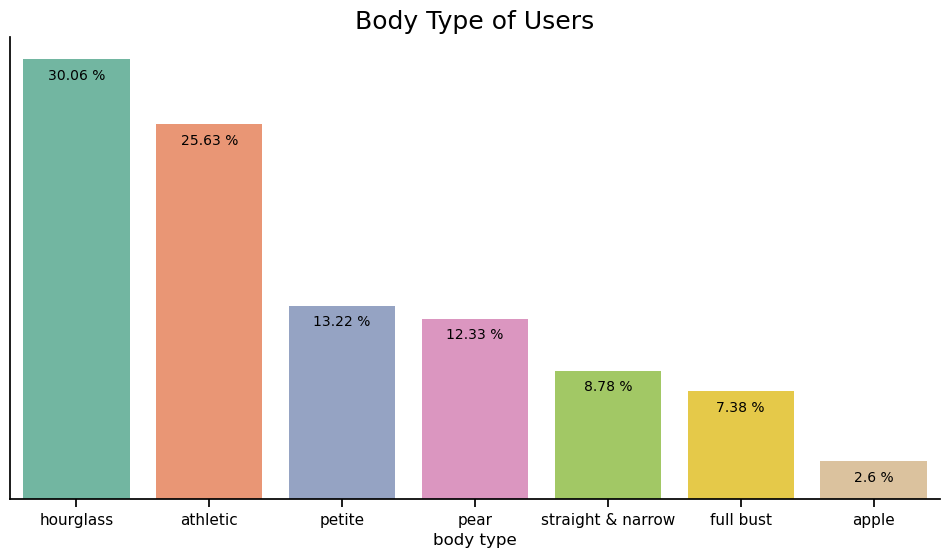

In [12]:
body_type = (renttherunway['body type'].value_counts(normalize=True)*100).round(2)
body_type_g, fig = plt.subplots(1,1,figsize=(12,6))
body_type_g = sns.barplot(x=body_type.index,y=body_type.values)
body_type_g.set_title('Body Type of Users',fontsize=18)
body_type_g.set_yticks([])
for i, v in enumerate(body_type.values):
   body_type_g.text(i, v - 1.4, f'{v} %', ha='center',fontsize=10)
body_type_g.spines['top'].set_visible(False)
body_type_g.spines['right'].set_visible(False)

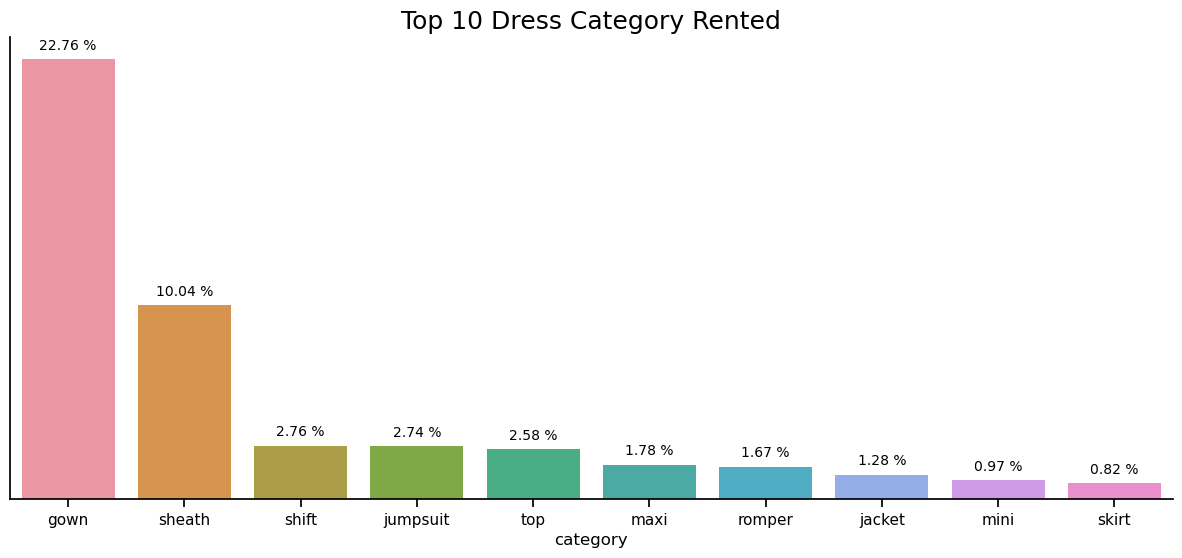

In [13]:
category = (renttherunway['category'].value_counts(normalize=True)*100).round(2)[1:11]
category_g, fig = plt.subplots(1,1,figsize=(15,6))
category_g = sns.barplot(x=category.index,y=category.values)
category_g.set_title('Top 10 Dress Category Rented',fontsize=18)
category_g.set_yticks([])
for i, v in enumerate(category.values):
   category_g.text(i, v + .5, f'{v} %', ha='center',fontsize=10)
category_g.spines['top'].set_visible(False)
category_g.spines['right'].set_visible(False)

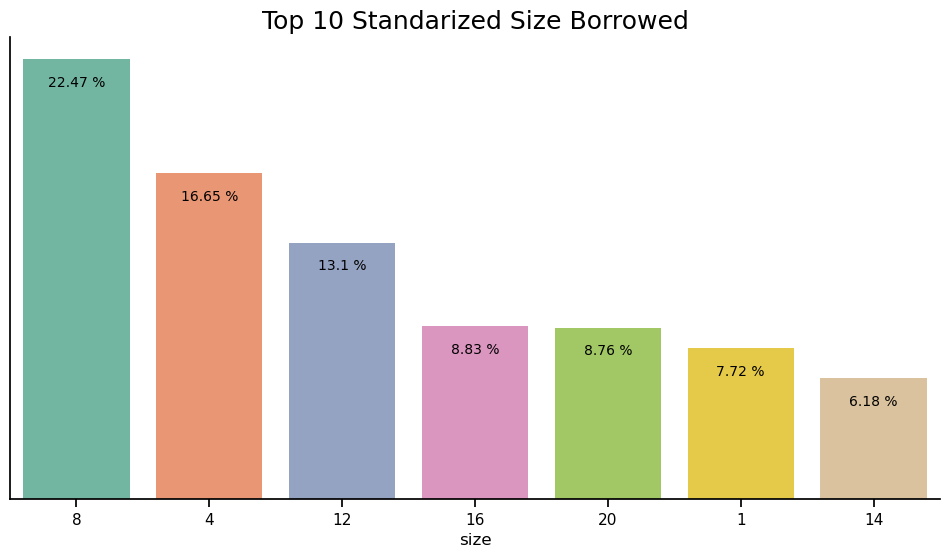

In [14]:
size = (renttherunway['size'].value_counts(normalize=True)[:7]*100).round(2)
size_g, fig = plt.subplots(1,1,figsize=(12,6))
size_g = sns.barplot(x=size.index,y=size.values,order=size.index)
size_g.set_title('Top 10 Standarized Size Borrowed',fontsize=18)
size_g.set_yticks([])
for i, v in enumerate(size.values):
   size_g.text(i, v - 1.4, f'{v} %', ha='center',fontsize=10)
size_g.spines['top'].set_visible(False)
size_g.spines['right'].set_visible(False)

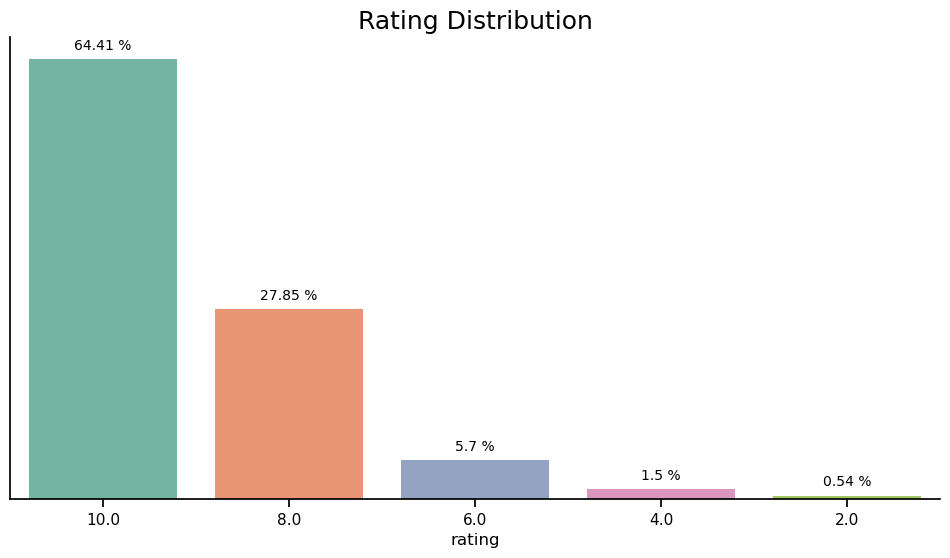

In [15]:
rating = (renttherunway['rating'].value_counts(normalize=True)*100).round(2)
rating_g, fig = plt.subplots(1,1,figsize=(12,6))
rating_g = sns.barplot(x=rating.index,y=rating.values,order=rating.index)
rating_g.set_title('Rating Distribution',fontsize=18)
rating_g.set_yticks([])
for i, v in enumerate(rating.values):
   rating_g.text(i, v + 1.4, f'{v} %', ha='center',fontsize=10)
rating_g.spines['top'].set_visible(False)
rating_g.spines['right'].set_visible(False)

## Numerical Columns

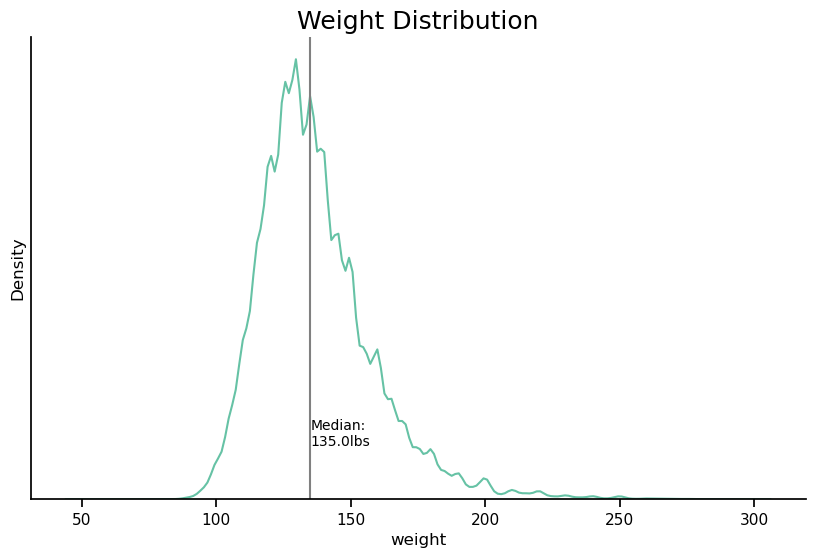

In [16]:
median_weight = renttherunway['weight'].median()
weight_g, fig = plt.subplots(1,1,figsize=(10,6))
weight_g = sns.kdeplot(data=renttherunway,x='weight')
weight_g.axvline(x = median_weight, color='grey')
weight_g.set_title('Weight Distribution',fontsize=18)
weight_g.text(median_weight, .003, f"Median:\n{median_weight}lbs",fontsize=10)
weight_g.set_yticks([])
weight_g.spines['top'].set_visible(False)
weight_g.spines['right'].set_visible(False)

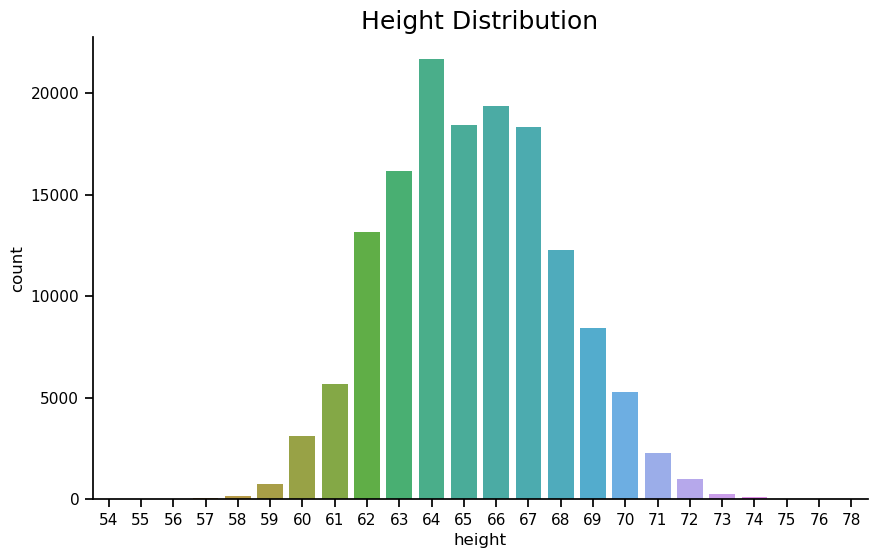

In [17]:
median_height = renttherunway['height'].median()
height_g, fig = plt.subplots(1,1,figsize=(10,6))
height_g = sns.countplot(data=renttherunway,x='height')
height_g.set_title('Height Distribution',fontsize=18)
height_g.spines['top'].set_visible(False)
height_g.spines['right'].set_visible(False)

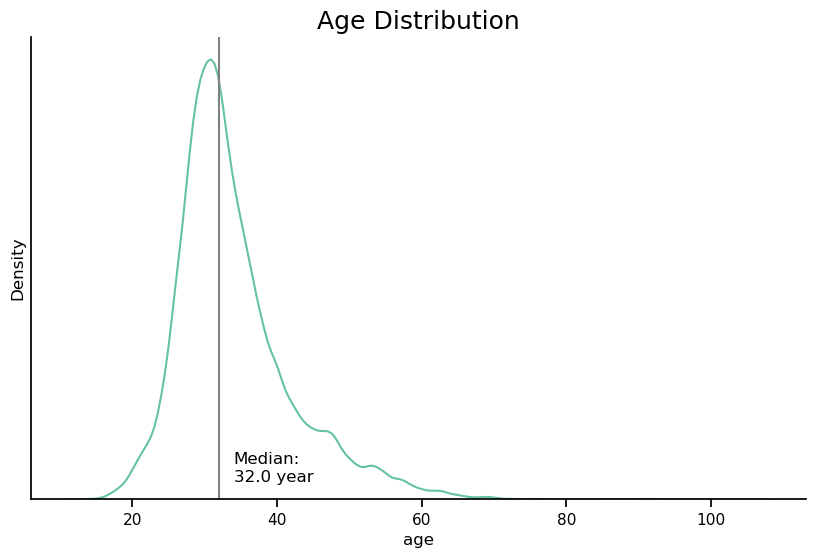

In [18]:
# age_g = sns.kdeplot(data=renttherunway,x='age')
# age_g.set_title('Age Distribution')
median_age = renttherunway['age'].median()
age_g, fig = plt.subplots(1,1,figsize=(10,6))
age_g = sns.kdeplot(data=renttherunway,x='age')
age_g.axvline(x = median_age, color='grey')
age_g.set_title('Age Distribution',fontsize=18)
age_g.text(median_age+2, .003, f"Median:\n{median_age} year")
age_g.set_yticks([])
age_g.spines['top'].set_visible(False)
age_g.spines['right'].set_visible(False)

## Timeseries

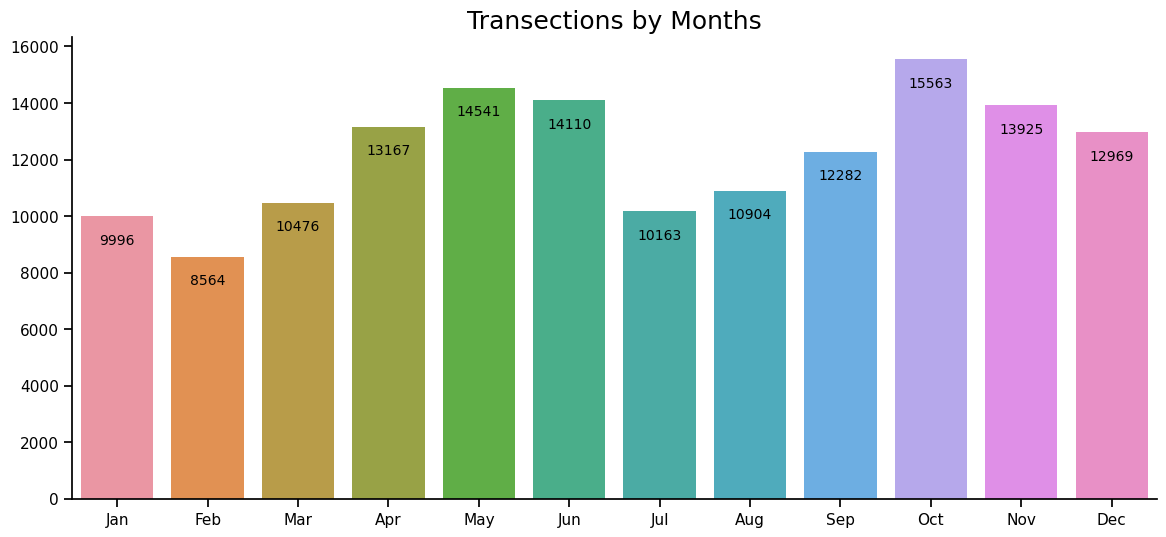

In [19]:
renttherunway['review_month'] = renttherunway['review_date'].dt.month
rent_by_months = renttherunway.groupby('review_month')['review_date'].count()
month_g, fig = plt.subplots(1,1,figsize=(14,6))
month_g = sns.barplot(x=rent_by_months.index, y=rent_by_months.values)
month_g.set_title('Transections by Months',fontsize=18)
month_g.set_xticks(range(12),['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
month_g.set_xlabel('')
for i, v in enumerate(rent_by_months.values):
   month_g.text(i, v - 1000, f'{v}', ha='center',fontsize=10)
month_g.spines['top'].set_visible(False)
month_g.spines['right'].set_visible(False)

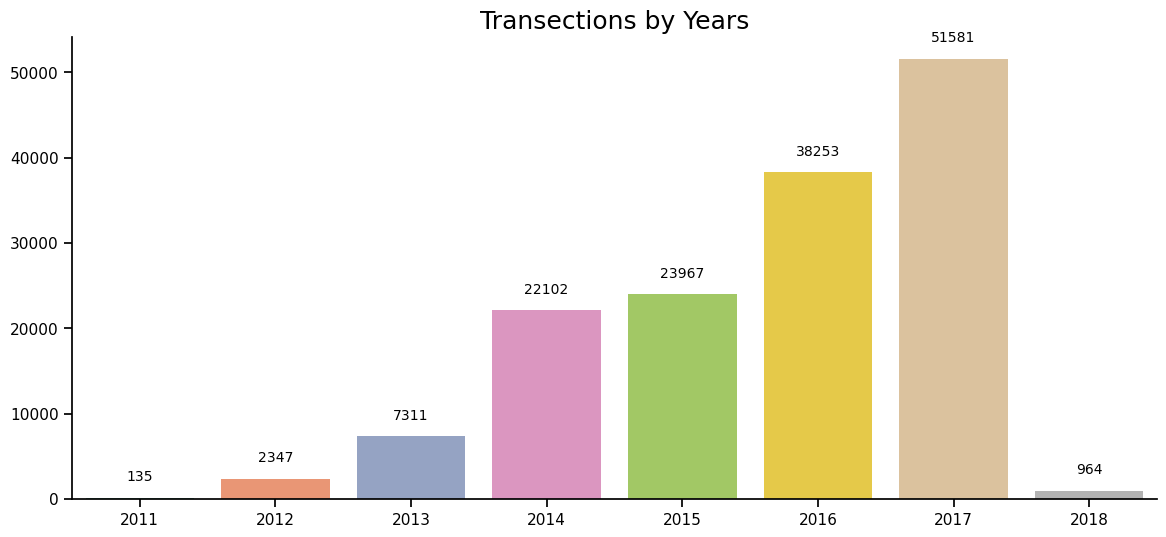

In [20]:
renttherunway['review_year'] = renttherunway['review_date'].dt.year
rent_by_years = renttherunway.groupby('review_year')['review_date'].count()
year_g, fig = plt.subplots(1,1,figsize=(14,6))
year_g = sns.barplot(x=rent_by_years.index, y=rent_by_years.values)
year_g.set_title('Transections by Years',fontsize=18)
year_g.set_xlabel('')
for i, v in enumerate(rent_by_years.values):
   year_g.text(i, v + 2000, f'{v}', ha='center',fontsize=10)
year_g.spines['top'].set_visible(False)
year_g.spines['right'].set_visible(False)

In [21]:
timeseries = renttherunway.groupby('review_date')['review_date'].count()
daily_g = go.Figure(go.Scatter(x=timeseries.index, y=timeseries.values,mode='lines'))
date_buttons = [{'count': 7, 'step': "year", 'stepmode': "todate", 'label': "YTD"},
                {'count': 12, 'step': "month", 'stepmode': "backward", 'label': "1Y"},
                {'count': 6, 'step': "month", 'stepmode': "backward", 'label': "6M"},
                {'count': 3, 'step': "month", 'stepmode': "backward", 'label': "3M"},
                {'count': 1, 'step': "month", 'stepmode': "backward", 'label': "1M"},
                {'count': 14, 'step': "day", 'stepmode': "backward", 'label': "14D"}]
graph_buttons = [{'label': "Line Plot",'method': "update",'args': [{"type": "scatter", 'mode': 'line'}]},
                 {'label': "Bar Plot",'method': "update",'args': [{"type": "bar"}]}]
daily_g.update_xaxes(rangeselector={'buttons': date_buttons})
daily_g.update_layout(
    {'updatemenus': [{'type': "buttons",'direction': 'down','x': 1.1, 'y': 0.5,'showactive': True,'active': 0,'buttons': graph_buttons}]},
    hovermode="x",title='Transections By Dates')
daily_g.show()

## Correlations

<Axes: >

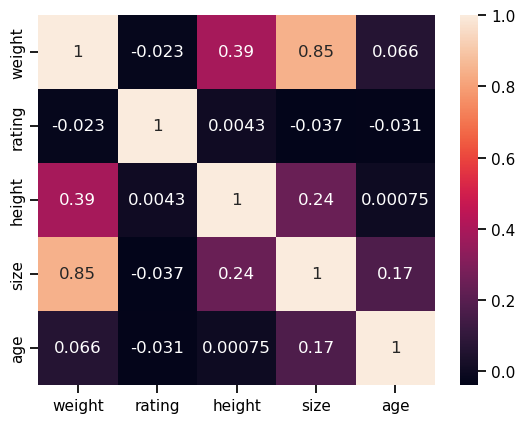

In [22]:
sns.heatmap(renttherunway.drop(columns=['user_id', 'item_id','review_month','review_year']).corr(numeric_only=True),annot=True)